In [79]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [6]:
#Data frame
salary_df = pd.read_csv('salary.csv')

In [7]:
salary_df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


## Data Analysis

In [19]:
# Data Analysis 

# Step 1 : make sure we have no null variables
sns.heatmap(salary_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [20]:
# Step 2: get information about data frame
salary_df.info()
salary_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [32]:
# get years of experience for min salary
salary_df['YearsExperience'][salary_df['Salary'] == salary_df['Salary'].min()]
# get years of experience for max salary
salary_df['YearsExperience'][salary_df['Salary'] == salary_df['Salary'].max()]

34    13.5
Name: YearsExperience, dtype: float64

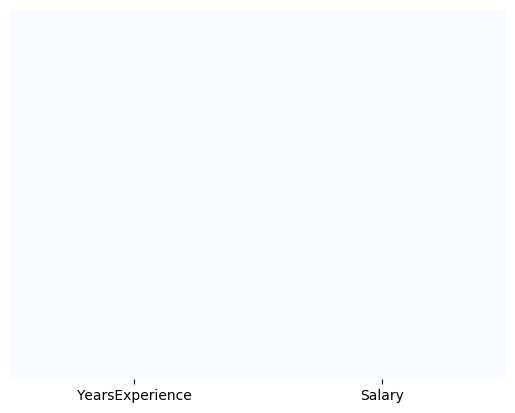

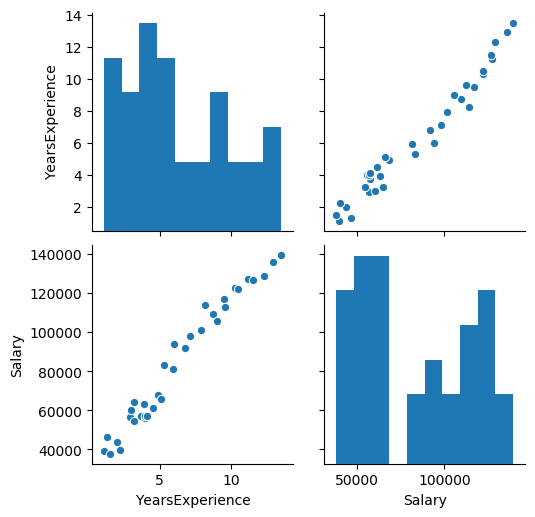

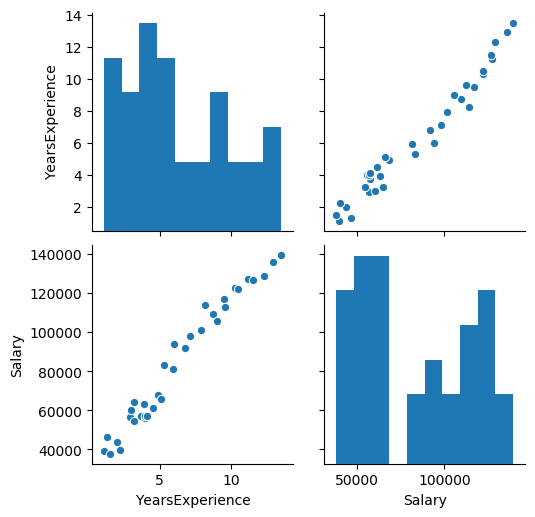

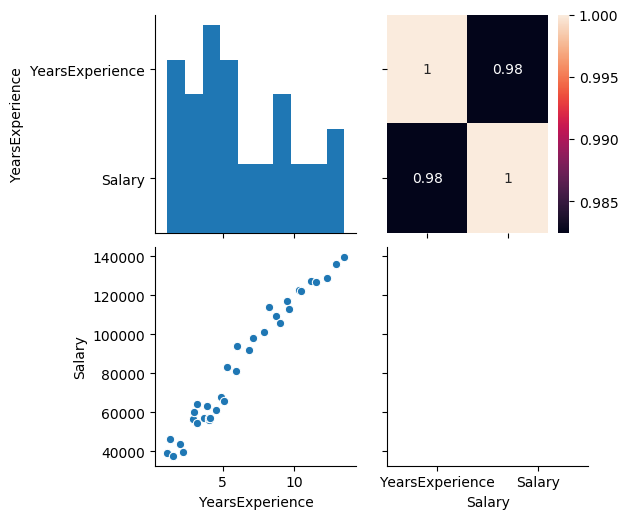

In [ ]:
# Data visualization

# give scatterplot of variables in data frame
sns.pairplot(salary_df)

#see correlation between variables
correlation_matrix = salary_df.corr()
sns. heatmap(correlation_matrix, annot= True) 
plt.show()

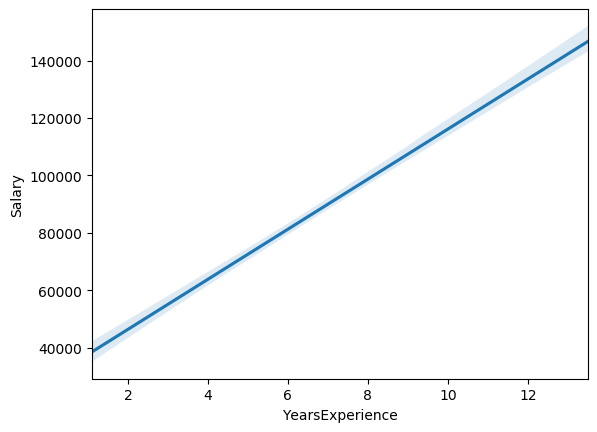

In [45]:
sns.regplot(data=salary_df, x='YearsExperience', y='Salary',scatter=False)
plt.show()

## Creating training + testing datasets

In [62]:
X= salary_df[['YearsExperience']] # independent variable
y = salary_df[['Salary']] # dependent variable (output) 
# we are trying to find a relationship between X and y 

In [63]:
# converting data type in a numpy array format 
X= np.array(X).astype('float32')
y= np.array(y).astype('float32')

In [64]:
# splitting the date into training data and testing data 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25) # 20% of data allocated for testing, 80% training

## Train model

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression(fit_intercept= True) # y =ax + b, fit_intercept= True means b can be not null
regression_model_sklearn.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate model

In [72]:
regression_model_sklearn_eval = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_eval

0.9518135656564591

In [73]:
print ('Linear Model Coefficient (m): ', regression_model_sklearn.coef_) # y= mX + b
print ('Linear Model Coefficient (b): ', regression_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[8834.925]]
Linear Model Coefficient (b):  [28310.645]


## Test model

In [76]:
y_prediction = regression_model_sklearn.predict(X_test) #generating salary prediction for test data
y_prediction

array([[ 63650.344],
       [ 71601.78 ],
       [105174.484],
       [ 75135.75 ],
       [ 73368.766],
       [ 53931.93 ],
       [ 54815.418],
       [ 98106.55 ],
       [147582.12 ]], dtype=float32)

In [77]:
y_prediction.shape

(9, 1)

#### trained model vs. original dataset

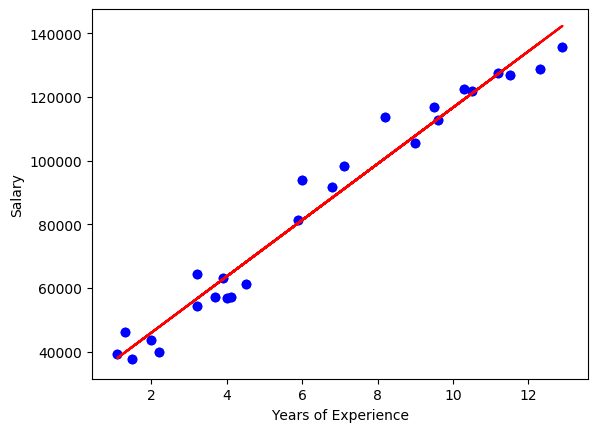

In [82]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, regression_model_sklearn.predict(X_train), color='red')
plt.ylabel('Salary')
plt.xlabel('Years of Experience')
plt.show()

In [88]:
# get salary for employee with 5 years of experience
num_years_exp = [[5]]
salary = regression_model_sklearn.predict(num_years_exp)
salary

array([[72485.26855469]])